# Cross Validation

Cross validation is very useful for determining optimal model parameters such as our regularization parameter alpha. It first divides the training set into subsets (by default the sklearn package uses 3) and then selects an optimal hyperparameter (in this case alpha, our regularization parameter) based on test performance. For example, if we have 3 splits: A, B and C, we can do 3 training and testing combinations and then average test performance as an overall estimate of model performance for those given parameters. (The three combinations are: Train on A+B test on c, train on A+C test on B, train on B+C test on A.) We can do this across various alpha values in order to determine an optimal regularization parameter. By default, sklearn will even estimate potential alpha for you, or you can explicit check the performance of specific alpha.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Housing_Prices/train.csv')
print(len(df))
df.head()

1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
from sklearn.linear_model import LassoCV, RidgeCV

In [15]:
#Define X and Y
feats = [col for col in df.columns if df[col].dtype in [np.int64, np.float64]]

X = df[feats].drop('SalePrice', axis=1)

#Impute null values
for col in X:
    avg = X[col].mean()
    X[col] = X[col].fillna(value=avg)

y = df.SalePrice

print('Number of X features: {}'.format(len(X.columns)))

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)
L1 = LassoCV()
print('Model Details:\n', L1)

L1.fit(X_train, y_train)

print('Optimal alpha: {}'.format(L1.alpha_))
print('First 5 coefficients:\n', L1.coef_[:5])
count = 0
for num in L1.coef_:
    if num == 0:
        count += 1
print(count)
print('Number of coefficients set to zero: {}'.format(count))

# LF
y_hat_train = L1.predict(X_train)
y_hat_test = L1.predict(X_test)

train_mse_lasso = mean_squared_error(y_train, y_hat_train)
test_mse_lasso = mean_squared_error(y_test, y_hat_test)

Number of X features: 37
Model Details:
 LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Optimal alpha: 217493.15776250706
First 5 coefficients:
 [-2.2677372  -0.         -0.          0.25409967  0.        ]
24
Number of coefficients set to zero: 24


In [16]:
# LF - introduces LassoCV - performs cross validation using Lasso with different alphas - so we end up with the best alpha!

# Notes on Coefficients and Using Lasso for Feature Selection
The Lasso technique also has a very important and profound effect: feature selection. That is, many of your feature coefficients will be optimized to zero, effectively removing their impact on the model. This can be a useful application in practice when trying to reduce the number of features in the model. Note that which variables are set to zero can change if multicollinearity is present in the data. That is, if two features within the X space are highly correlated, then which takes precendence in the model is somewhat arbitrary, and as such, coefficient weights between multiple runs of `.fit()` could lead to substantially different coefficient values.

# With Normalization

In [17]:
#Define X and Y
feats = [col for col in df.columns if df[col].dtype in [np.int64, np.float64]]

X = df[feats].drop('SalePrice', axis=1)

#Impute null values
for col in X:
    avg = X[col].mean()
    X[col] = X[col].fillna(value=avg)

y = df.SalePrice

print('Number of X features: {}'.format(len(X.columns)))

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)
L1 = LassoCV(normalize = True)
print('Model Details:\n', L1)
L1.fit(X_train, y_train)

print('Optimal alpha: {}'.format(L1.alpha_))
print('First 5 coefficients:\n', L1.coef_[:5])
count = 0
for num in L1.coef_:
    if num == 0:
        count += 1
print(count)
print('Number of coefficients set to zero: {}'.format(count))

# LF
y_hat_train = L1.predict(X_train)
y_hat_test = L1.predict(X_test)

train_mse_lassonorm = mean_squared_error(y_train, y_hat_train)
test_mse_lassonorm = mean_squared_error(y_test, y_hat_test)

Number of X features: 37
Model Details:
 LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Optimal alpha: 152.2990521592692
First 5 coefficients:
 [ 0.00000000e+00 -5.30992770e+01  0.00000000e+00  1.30055995e-01
  2.07428158e+04]
23
Number of coefficients set to zero: 23


# Calculate the Mean Squarred Error 
Calculate the mean squarred error between both of the models above and the test set.

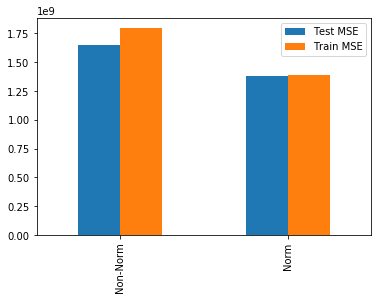

In [18]:
# Your code here
# LF - added code above to gather MSEs

import matplotlib.pyplot as plt


to_plot = pd.DataFrame([train_mse_lasso,train_mse_lassonorm], [test_mse_lasso,test_mse_lassonorm]).reset_index()
to_plot.index=['Non-Norm','Norm']
to_plot.columns = ['Test MSE', 'Train MSE']
to_plot
to_plot.plot(kind='bar')

# Repeat this Process for the Ridge Regression Object

In [19]:
# Your code here
# LF 
#Define X and Y
feats = [col for col in df.columns if df[col].dtype in [np.int64, np.float64]]

X = df[feats].drop('SalePrice', axis=1)

#Impute null values
for col in X:
    avg = X[col].mean()
    X[col] = X[col].fillna(value=avg)

y = df.SalePrice

print('Number of X features: {}'.format(len(X.columns)))

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)
L1 = RidgeCV()
print('Model Details:\n', L1)

L1.fit(X_train, y_train)

print('Optimal alpha: {}'.format(L1.alpha_))
print('First 5 coefficients:\n', L1.coef_[:5])
count = 0
for num in L1.coef_:
    if num == 0:
        count += 1
print(count)
print('Number of coefficients set to zero: {}'.format(count))

# LF
y_hat_train = L1.predict(X_train)
y_hat_test = L1.predict(X_test)

train_mse_ridge = mean_squared_error(y_train, y_hat_train)
test_mse_ridge = mean_squared_error(y_test, y_hat_test)

Number of X features: 37
Model Details:
 RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
Optimal alpha: 10.0
First 5 coefficients:
 [-2.16940043e+00 -2.02961203e+02 -1.41461714e+02  4.78647947e-01
  1.81684550e+04]
0
Number of coefficients set to zero: 0


In [20]:
# Your code here
# LF 
#Define X and Y
feats = [col for col in df.columns if df[col].dtype in [np.int64, np.float64]]

X = df[feats].drop('SalePrice', axis=1)

#Impute null values
for col in X:
    avg = X[col].mean()
    X[col] = X[col].fillna(value=avg)

y = df.SalePrice

print('Number of X features: {}'.format(len(X.columns)))

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)
L1 = RidgeCV(normalize = True)
print('Model Details:\n', L1)

L1.fit(X_train, y_train)

print('Optimal alpha: {}'.format(L1.alpha_))
print('First 5 coefficients:\n', L1.coef_[:5])
count = 0
for num in L1.coef_:
    if num == 0:
        count += 1
print(count)
print('Number of coefficients set to zero: {}'.format(count))

# LF
y_hat_train = L1.predict(X_train)
y_hat_test = L1.predict(X_test)

train_mse_ridgenorm = mean_squared_error(y_train, y_hat_train)
test_mse_ridgenorm = mean_squared_error(y_test, y_hat_test)

Number of X features: 37
Model Details:
 RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=True, scoring=None, store_cv_values=False)
Optimal alpha: 0.1
First 5 coefficients:
 [-1.86402012e+00 -1.46576196e+02 -8.02831533e+00  3.27499787e-01
  1.49386269e+04]
0
Number of coefficients set to zero: 0


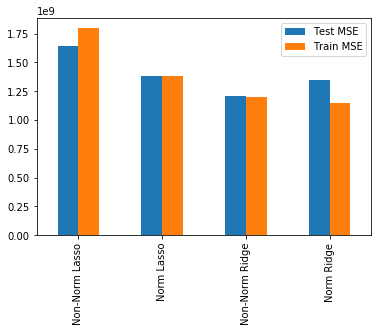

In [21]:
to_plot = pd.DataFrame([train_mse_lasso,train_mse_lassonorm, train_mse_ridge, train_mse_ridgenorm], 
                       [test_mse_lasso,test_mse_lassonorm, test_mse_ridge, test_mse_ridgenorm]).reset_index()
to_plot.index=['Non-Norm Lasso','Norm Lasso', 'Non-Norm Ridge', 'Norm Ridge']
to_plot.columns = ['Test MSE', 'Train MSE']
to_plot
to_plot.plot(kind='bar')

# Practice Preprocessing and Feature Engineering
Use some of our previous techniques including normalization, feature engineering, and dummy variables on the dataset. Then, repeat fitting and tuning a model, observing the performance impact compared to above.

In [3]:
# Your code here
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.get_dummies(df).dropna().describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,726.842105,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,...,0.003568,0.103479,0.000892,0.850134,0.063336,0.000892,0.008029,0.016057,0.805531,0.106155
std,420.769012,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,...,0.059655,0.304719,0.029867,0.357100,0.243676,0.029867,0.089282,0.125751,0.395968,0.308174
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,725.000000,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1091.000000,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
years = pd.DataFrame(df.YearBuilt.value_counts()).reset_index().sort_values(by="index", ascending=False)

In [9]:
years.rename(columns={'index':'year'}, inplace=True)
years

,year,YearBuilt
103,2010,1
27,2009,18
17,2008,23
3,2007,49
0,2006,67
1,2005,64
2,2004,54
4,2003,45
16,2002,23
22,2001,20


In [10]:
years.columns = ['year', 'count']
years

,year,count
103,2010,1
27,2009,18
17,2008,23
3,2007,49
0,2006,67
1,2005,64
2,2004,54
4,2003,45
16,2002,23
22,2001,20


In [11]:
df1 = pd.get_dummies(df).dropna()

In [12]:
years1 = pd.DataFrame(df1.YearBuilt.value_counts()).reset_index().sort_values(by="index", ascending=False)

In [13]:
years1

,index,YearBuilt
108,2010,1
16,2009,17
6,2008,23
2,2007,46
0,2006,64
1,2005,64
3,2004,46
4,2003,37
21,2002,14
34,2001,11


In [35]:
from sklearn.preprocessing import normalize
normalize(df[['LotArea','LotFrontage']].dropna())

array([[0.99997042, 0.00769208],
       [0.99996528, 0.00833304],
       [0.99998173, 0.00604433],
       ...,
       [0.99997336, 0.00729908],
       [0.99997551, 0.00699787],
       [0.99997152, 0.00754733]])

In [69]:
df1['LotArea'].describe()

count      1121.000000
mean      10122.956289
std        8129.302641
min        1300.000000
25%        7590.000000
50%        9416.000000
75%       11361.000000
max      215245.000000
Name: LotArea, dtype: float64

In [70]:
df1["LotAreaBand"] = pd.cut(df1["LotArea"], bins=[0,5000, 25000, 50000, 100000, 200000, 1000000], labels=["<5000", "5-25000", "25-50000", "50-100k", "100-200k", "200k+"])


In [73]:
df1[["LotAreaBand","LotArea"]]

,LotAreaBand,LotArea
0,5-25000,8450
1,5-25000,9600
2,5-25000,11250
3,5-25000,9550
4,5-25000,14260
5,5-25000,14115
6,5-25000,10084
8,5-25000,6120
9,5-25000,7420
10,5-25000,11200


In [74]:
df1["LotAreaBand"].value_counts()

5-25000     996
<5000       107
25-50000     13
50-100k       4
200k+         1
100-200k      0
Name: LotAreaBand, dtype: int64

In [75]:
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotAreaBand
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,1,0,0,0,0,1,0,5-25000
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,1,0,0,0,0,1,0,5-25000
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,1,0,0,0,0,1,0,5-25000
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,1,1,0,0,0,0,0,5-25000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,1,0,0,0,0,1,0,5-25000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,1,0,0,0,0,1,0,5-25000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,1,0,0,0,0,1,0,5-25000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,1,1,0,0,0,0,0,5-25000
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,1,0,0,0,0,1,0,5-25000
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,0,0,1,0,0,0,0,1,0,5-25000


In [77]:
df1.drop("BsmtFinSF1", axis=1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotAreaBand
0,1,60,65.0,8450,7,5,2003,2003,196.0,0,...,0,0,1,0,0,0,0,1,0,5-25000
1,2,20,80.0,9600,6,8,1976,1976,0.0,0,...,0,0,1,0,0,0,0,1,0,5-25000
2,3,60,68.0,11250,7,5,2001,2002,162.0,0,...,0,0,1,0,0,0,0,1,0,5-25000
3,4,70,60.0,9550,7,5,1915,1970,0.0,0,...,0,0,1,1,0,0,0,0,0,5-25000
4,5,60,84.0,14260,8,5,2000,2000,350.0,0,...,0,0,1,0,0,0,0,1,0,5-25000
5,6,50,85.0,14115,5,5,1993,1995,0.0,0,...,0,0,1,0,0,0,0,1,0,5-25000
6,7,20,75.0,10084,8,5,2004,2005,186.0,0,...,0,0,1,0,0,0,0,1,0,5-25000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,1,1,0,0,0,0,0,5-25000
9,10,190,50.0,7420,5,6,1939,1950,0.0,0,...,0,0,1,0,0,0,0,1,0,5-25000
10,11,20,70.0,11200,5,5,1965,1965,0.0,0,...,0,0,1,0,0,0,0,1,0,5-25000


In [96]:
df1['Age'] = 2018 - df1['YearBuilt']

In [98]:
df1['LoadofRubbish'] = df1["LotArea"] / df1["Age"]

In [99]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotAreaBand,Age,LoadofRubbish
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,0,0,0,0,1,0,5-25000,15,563.333333
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,0,0,0,0,1,0,5-25000,42,228.571429
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,0,0,0,0,1,0,5-25000,17,661.764706
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,1,0,0,0,0,0,5-25000,103,92.718447
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,0,0,0,0,1,0,5-25000,18,792.222222


In [80]:
for col in df1.columns:
    print(col)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neig